In [ ]:
!pip install --upgrade tensorflow

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
img_size = 256
batch = 32
rgb_channels = 3
epochs = 20
n_classes = 4


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/orange/train",
    shuffle= True,
    image_size=(img_size, img_size),
    batch_size= batch
    )


Found 976 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['blackspot', 'canker', 'fresh', 'grenning']

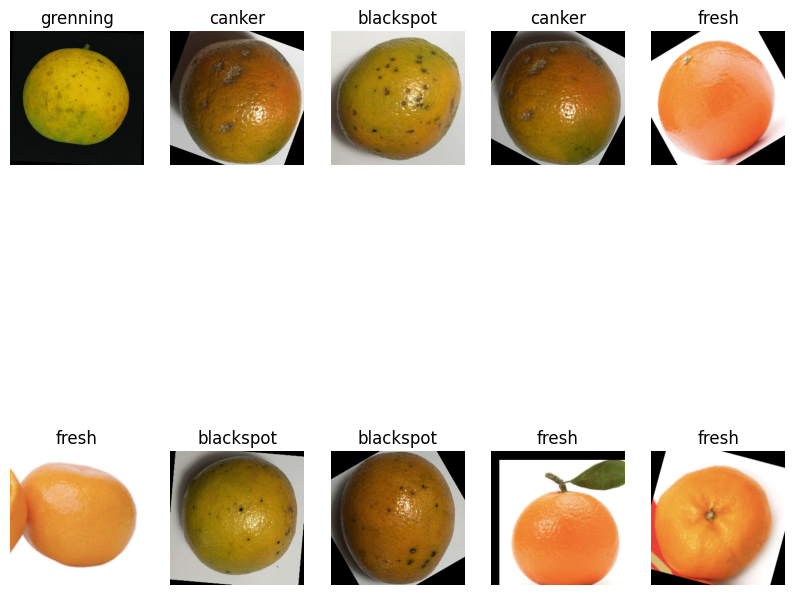

In [ ]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle =True, shuffle_size = 10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 6)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train = ds.take(train_size)
    validation = ds.skip(train_size).take(val_size)
    test = ds.skip(train_size).skip(val_size)



    return train, validation, test

In [ ]:
train, validation, test = get_dataset_partitions_tf(dataset)

In [ ]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation = validation.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"), # Removed experimental and call RandomFlip directly from tf.keras.layers
    tf.keras.layers.RandomRotation(0.2), # Removed experimental and call RandomRotation directly from tf.keras.layers
])

In [ ]:
input_shape = (batch, img_size, img_size, rgb_channels)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape = (input_shape))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train,
    epochs = epochs,
    batch_size = batch,
    verbose = 1,
    validation_data = validation
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.9814 - loss: 0.0603 - val_accuracy: 0.9792 - val_loss: 0.0626
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.9667 - loss: 0.0834 - val_accuracy: 0.9792 - val_loss: 0.0717
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.9579 - loss: 0.1154 - val_accuracy: 0.9479 - val_loss: 0.1158
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9318 - loss: 0.1534 - val_accuracy: 0.9688 - val_loss: 0.0802
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.9824 - loss: 0.0663 - val_accuracy: 0.9896 - val_loss: 0.0496
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9708 - loss: 0.0800 - val_accuracy: 0.9375 - val_loss: 0.1364
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9659 - loss: 0.0948 - val_accuracy: 0.9688 - val_loss: 0.0516
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9558 - loss: 0.0944 - val_accuracy: 0.9792 - v

In [ ]:
scores = model.evaluate(test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9771 - loss: 0.0526


In [ ]:
scores

[0.04271383211016655, 0.9765625]

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 24}

In [ ]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

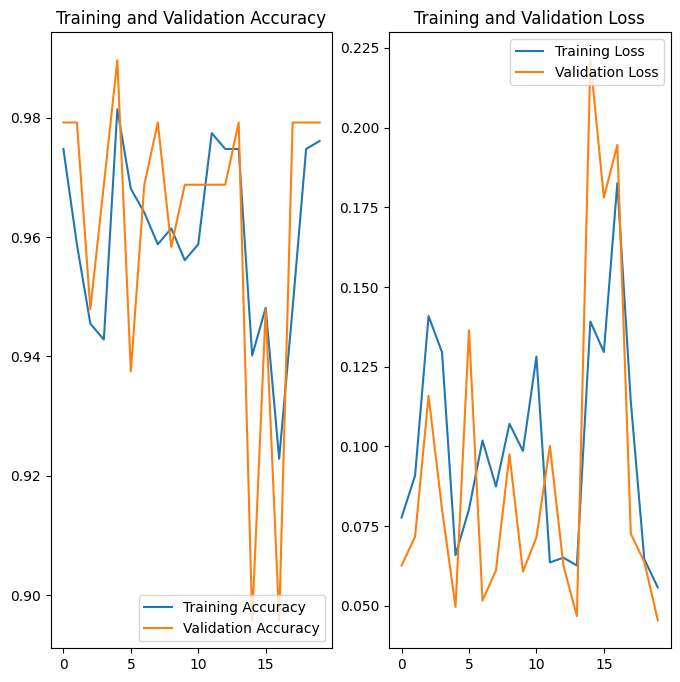

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label= 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image_batch[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


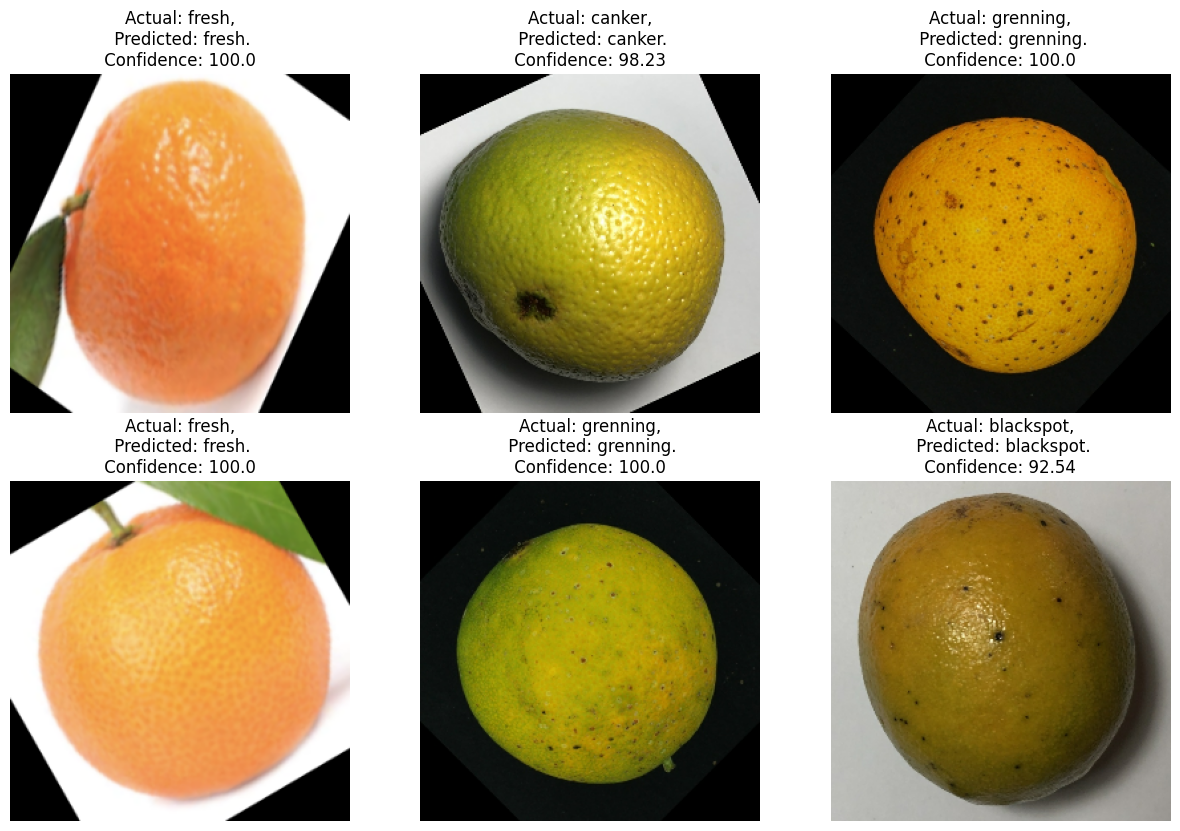

In [ ]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in test.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i+1)
        ax.set_facecolor("yellow")
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, image_batch[i].numpy())
        actual_class = class_names[label_batch[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence} ")

        plt.axis("off")